# 1. Loading dataset

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('un-general-debates-blueprint.csv.gz')

In [7]:
df.sample(3)

,session,year,country,country_name,speaker,position,text
3456,49,1994,GNQ,Equatorial Guinea,Mr. Oyono Ndong Mifumu,Minister for Foreign Affairs,I would be disloyal to the\nfeelings of the de...
410,28,1973,SDN,Sudan,Khalid,NaN,"﻿194.\tMr. President, your opening remarks [21..."
4504,55,2000,DOM,Dominican Republic,Hugo Tolentino Dipp,Minister for Foreign Affairs,Representing and speaking on behalf of\nthe Go...


# 2. DataFrame summary statistics

In [8]:
df['length'] = df['text'].str.len()

In [9]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text', 'length'],
      dtype='object')

In [10]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
length           int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
 7   length        7507 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 469.3+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [13]:
df[['country','speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,NZL,46
speaker,7480,5428,Seyoum Mesfin,12


# 3. Checking for missing data

## Checking

In [14]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

## Fixing

In [15]:
df['speaker'].fillna('unknown',inplace=True)

In [16]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

## More problems

In [17]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Mr. George W Bush     1
Bush                  1
George Bush           1
Name: speaker, dtype: int64

# 4. Plotting distributions

## Length distribution

<AxesSubplot:>

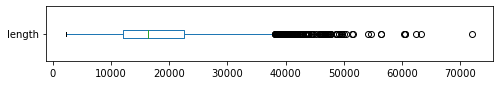

In [18]:
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot:ylabel='Frequency'>

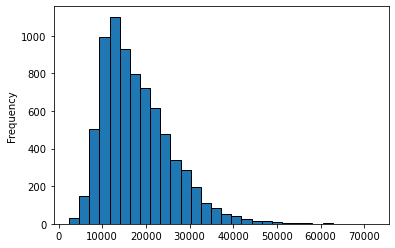

In [19]:
df['length'].plot(kind='hist', bins=30, figsize=(6, 4), edgecolor='k')

# 5. Distributions across categories

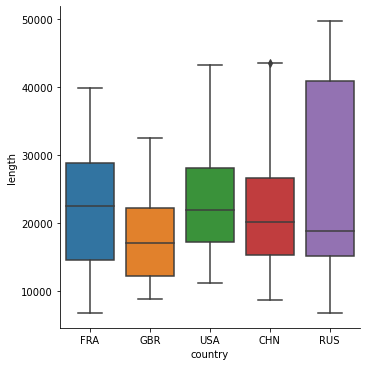

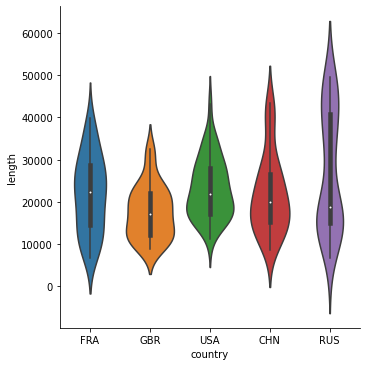

In [20]:
import seaborn as sns

where = df['country'].isin(['USA','FRA','GBR','CHN','RUS'])
sns.catplot(data=df[where], x='country', y='length', kind='box')
sns.catplot(data=df[where], x='country', y='length', kind='violin')

# 6. Development over time

<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

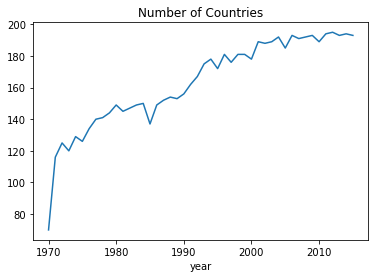

In [21]:
df.groupby('year').size().plot(title='Number of Countries')

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

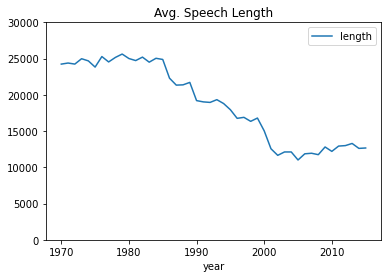

In [22]:
df.groupby('year').agg({'length':'mean'})\
  .plot(title='Avg. Speech Length', ylim=(0,30000))

# 7. Simple Text Processing
1. Case folding
2. Tokenization
3. Stop word removal

## 7.1 Case Folding

In [23]:
str.lower('Hello World!')

'hello world!'

## 7.2 Tokenization

In [24]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [25]:
text = "Let's defeat SARS-Cov-2 together in 2021!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-Cov-2|together|in


## 7.3 Stopword Removal

In [26]:
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [27]:
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [28]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [29]:
remove_stop(tokens)

['Let', 'defeat', 'SARS-Cov-2', 'together']

## 7.4 Processing a pipeline

In [30]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [31]:
prepare(text, pipeline)

['let', 'defeat', 'sars-cov-2', 'together']

## 7.5 Applying pipeline

In [32]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df.sample(3)

,session,year,country,country_name,speaker,position,text,length,tokens
183,26,1971,YUG,Yugoslavia,Mr. TEPAVAC,NaN,"1.\tMr. President, allow me to extend to you m...",17163,"[mr, president, allow, extend, warm, sincere, ..."
2004,40,1985,BRB,Barbados,Mr. Barrow,NaN,My delegation wishes to add its congratulation...,23052,"[delegation, wishes, add, congratulations, alr..."
5631,61,2006,ERI,Eritrea,Mr. Saleh Said MEKY,Deputy Prime Minister,On behalf of the \nGovernment and people of th...,13006,"[behalf, government, people, state, eritrea, a..."


## 7.6 Counting number of tokens (words)

In [33]:
df['num_tokens'] = df['tokens'].map(len)

In [34]:
df['year'].

SyntaxError: invalid syntax (<ipython-input-34-2e8262747b89>, line 1)

# 8. Word Frequency Analysis

In [36]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [37]:
more_tokens = tokenize("She likes dogs and cats")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [38]:
%%time
import numpy as np
tokens = df['tokens'].explode().values
counter = Counter(tokens)
print(counter.most_common(5))


[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
CPU times: user 1.7 s, sys: 44.5 ms, total: 1.75 s
Wall time: 1.75 s


In [39]:
%%time
counter = Counter()

df['tokens'].map(counter.update)

print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
CPU times: user 1.11 s, sys: 2.17 ms, total: 1.11 s
Wall time: 1.11 s


# 9. Word Counting, DataFrame version

In [40]:
def count_words(df, column='tokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [41]:
freq_df = count_words(df)
freq_df.head(6)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625


In [42]:
# count words with 10 or more characters
count_words(df, column='text',
           preprocess=lambda text: re.findall(r"\w{10,}", text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
preexisting,3
correlations,3
empirically,3


# 10. Frequency plot

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

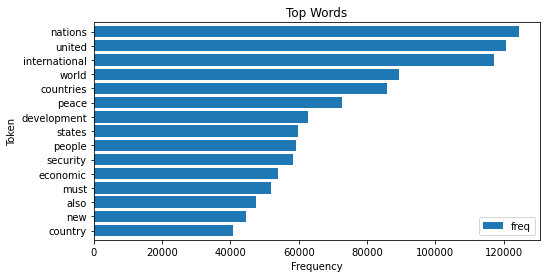

In [43]:
ax = freq_df.head(15).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# 11. Word Clouds

In [44]:
!pip install wordcloud

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]
text

'Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations in the Assembly to prevent a third world war — by forging alliances with old adversaries; by supporting the steady emergence of strong democracies accountable to their people and not to any foreign Power; and by building an international system that imposes a cost on those who choose conflict over cooperation, an order that recognizes the dignity and equal worth of all people.\nThat has been the work of seven decades. That is the ideal that this body has, at its best, pursued. Of course, there have been too many times when, collectively, we have fallen short of those ideals. Over the seven decades, terrible conflicts have claimed untold victims. But we have pressed forward, slowly, steadil

(-0.5, 399.5, 199.5, -0.5)

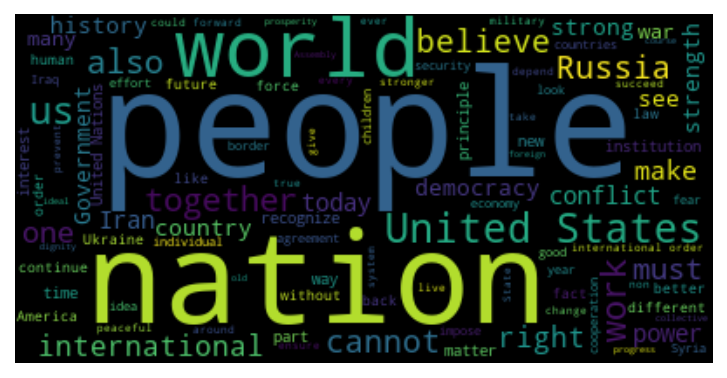

In [46]:
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

## Word Cloud framework

In [47]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

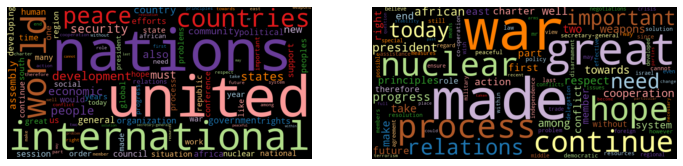

In [48]:
freq_2015_df = count_words(df)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)
#plt.tight_layout()###

# 12. Finding a Keyword-in-Context

In [49]:
!pip install textacy

In [50]:
from textacy.extract.kwic import keyword_in_context
import random

def kwic(doc_series, keyword, window=35, print_samples=5):
    
    def add_kwic(text):
        kwic_list.extend(keyword_in_context(text, keyword, ignore_case=True, window_width=window))
    
    kwic_list = []
    doc_series.map(add_kwic)
    
    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0]) + '  ' + \
                  sample[1]+'  ' +\
                  re.sub(r'[\n\t]',' ', sample[2]))

In [51]:
kwic(df[df['year']==2015]['text'], 'sdgs', print_samples=5)

5 random samples out of 73 contexts for 'sdgs':
f the word “transformation” in the   SDGs   is most revealing. That is what we
the Sustainable Development Goals (  SDGs  ). In other words, it is addressing
the Sustainable Development Goals (  SDGs  ), I quoted that portion of the Bib
iven the ambition reflected in the   SDGs  , we surely will need to scale up t
the Sustainable Development Goals (  SDGs  ) 15-29664 21/25  A/70/PV.23 01/10


# 13. N-gram

In [48]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [49]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens,2)))
tokens

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


['the', 'visible', 'manifestation', 'of', 'the', 'global', 'climate', 'change']

# 14. N-gram with stopword

In [50]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [51]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens,2, stopwords=stopwords)))

visible manifestation|global climate|climate change


# 15. Comparing frequencies across time intervals and categories

In [52]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [53]:
keywords = ['nuclear','terrorism','climate','freedom']
tokens = ['nuclear','climate','climate','freedom','climate','freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [54]:
def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [55]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

In [56]:
freq_df

,nuclear,terrorism,climate,freedom
year,,,,
1970,192,7,18,128
1971,275,9,35,205
1972,393,379,74,280
1973,347,124,79,266
1974,478,24,71,316
1975,578,20,53,232
1976,451,146,57,347
1977,675,75,58,321
1978,550,82,52,309


<AxesSubplot:xlabel='year'>

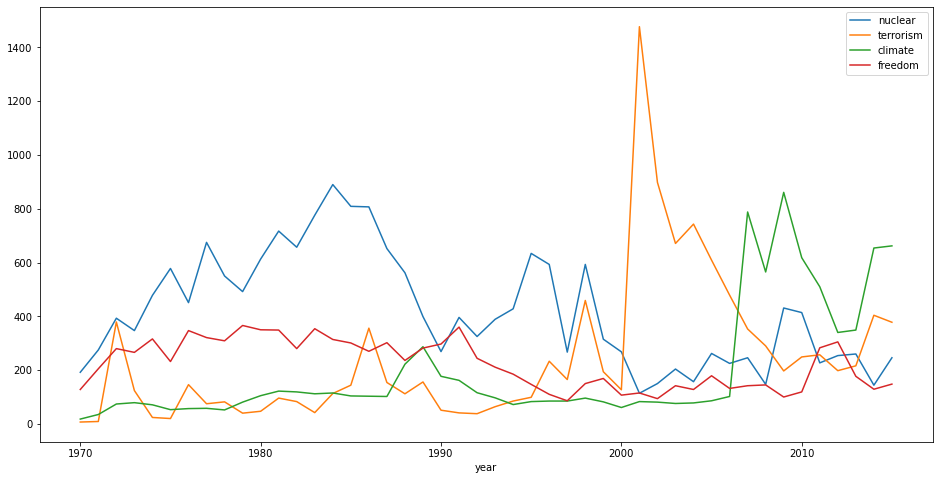

In [59]:
freq_df.plot(kind='line', figsize=(16,8))

---